In [3]:
# 라이브러리 호출
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

In [4]:
cd 언론사별

C:\Users\h_j06\Desktop\DMF\2nd_project\언론사별


C:\Users\h_j06\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
# 현재 작업 경로에 있는 폴더명과 파일명 확인
os.listdir()

['.ipynb_checkpoints',
 'media1_body_상위30그래프.png',
 'media1_Text_Prep.pkl',
 'media1_Title_Prep.pkl',
 'media1_title_상위30그래프.png',
 'media1_연관단어_미국.png',
 'media1_워드클라우드.png',
 'media2_body_상위30그래프.png',
 'media2_Text_Prep.pkl',
 'media2_Title_Prep.pkl',
 'media2_title_상위30그래프.png',
 'media2_연관단어_미국.png',
 'media2_워드클라우드.png',
 'media_group_1.xlsx',
 'media_group_2.xlsx',
 '보수언론고유키워드시각화.png',
 '보수언론고유키워드클라우드.png',
 '진보보수공통키워드비교.png',
 '진보보수공통키워드비교30개.png',
 '진보언론고유키워드시각화.png',
 '진보언론고유키워드클라우드.png']

In [6]:
# pkl 파일을 읽고 corpus, tfs 및 dtm 생성
# [참고] pkl 파일로 저장할 때 지정한 파이썬 객체의 개수만큼 변수를 지정해야 함
corpus, tfs, dtm = pd.read_pickle(filepath_or_buffer = 'media2_Text_Prep.pkl')

In [7]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환
fontList = fm.findSystemFonts(fontext = 'ttf')

# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명 선택
fontPath = [font for font in fontList if 'Gowun' in font]

# 반복문으로 컴퓨터에 설치한 폰트명 출력
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Gowun Batang
Gowun Batang


In [8]:
# 한글폰트와 글자 크기 설정
# [참고] 폰트를 설치하고 .matplotlib 폴더에서 fontlist-v3xx.json 파일을 삭제해야 함
plt.rc(group = 'font', family = 'Gowun Batang', size = 10)

# 그래프 크기와 해상도 설정
plt.rc(group = 'figure', figsize = (24, 12), dpi = 100)

## 고빈도 단어 시각화

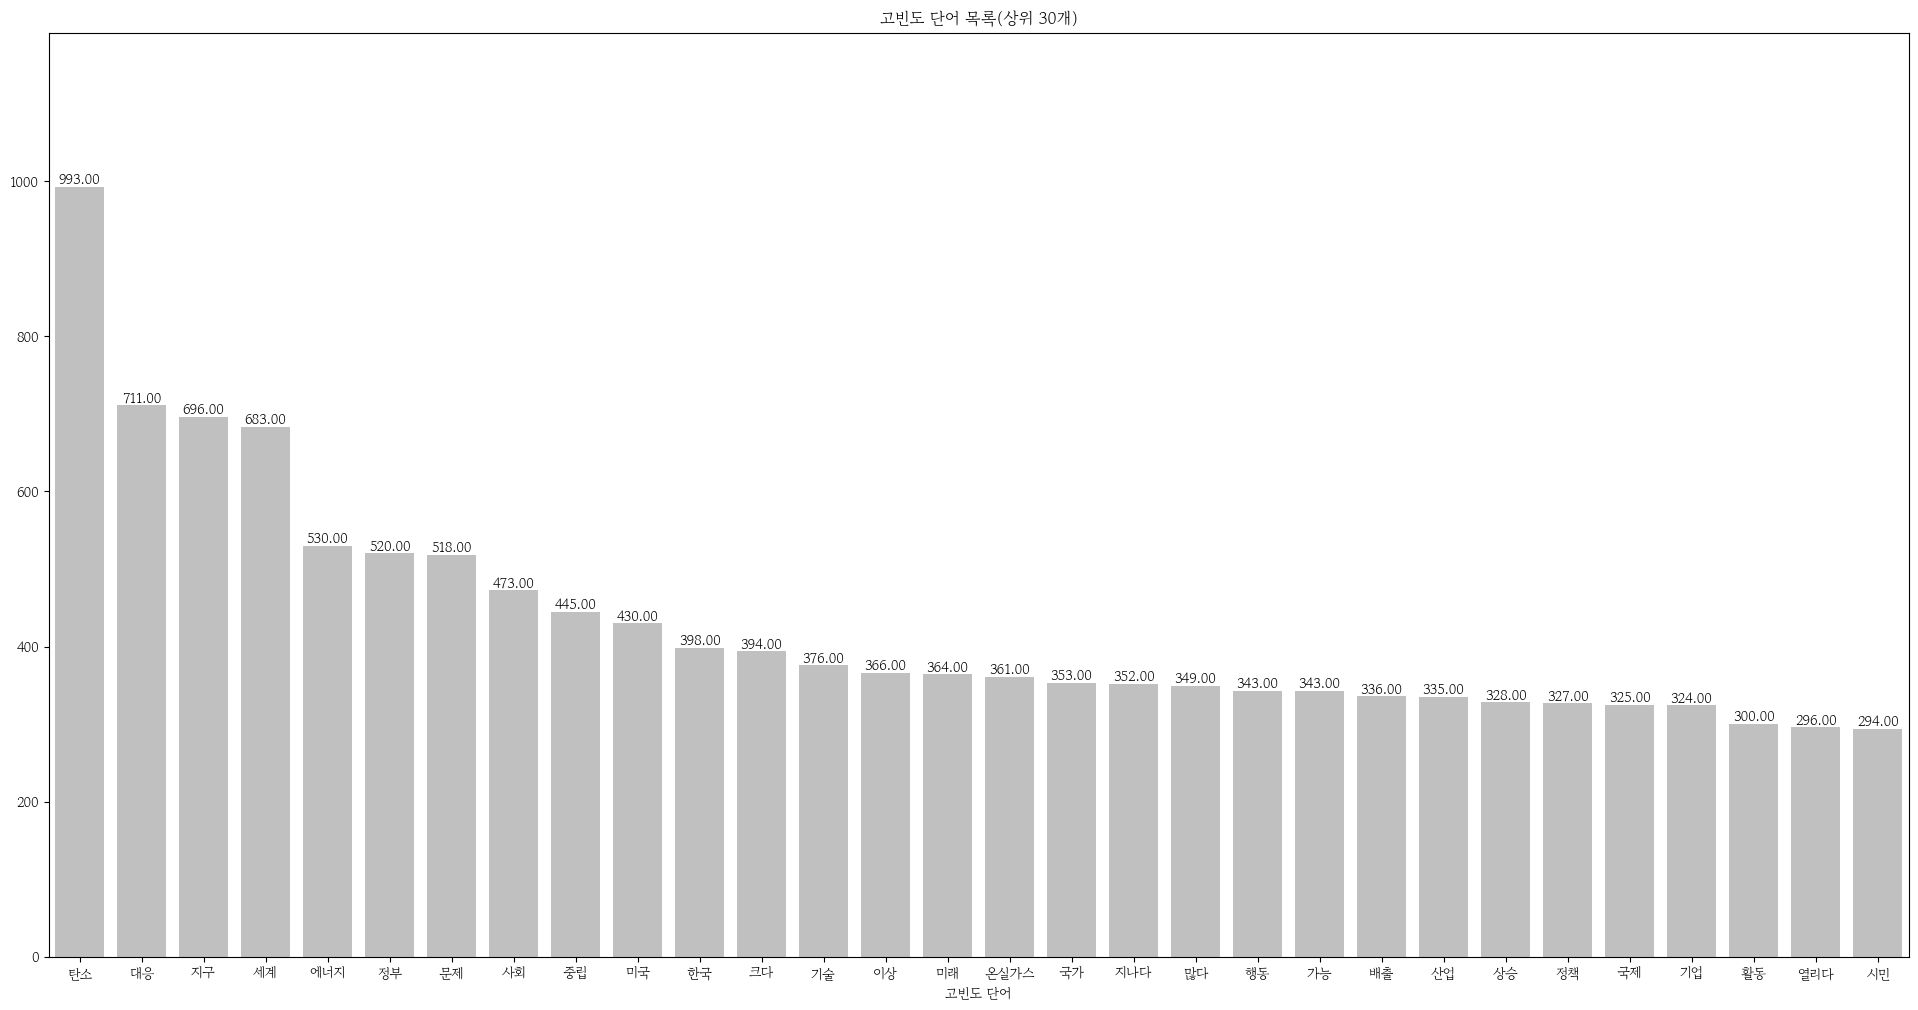

In [43]:
# 고빈도 단어로 막대 그래프 시각화
tfs_top30 = tfs.head(n = 30)
sns.barplot(x = tfs_top30.index, y = tfs_top30.values, color = 'silver')
plt.title(label = '고빈도 단어 목록(상위 30개)')
plt.xlabel(xlabel = '고빈도 단어')
plt.ylim(0, tfs_top30.max() * 1.2)
for i, v in enumerate(tfs_top30):
    plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom');

plt.savefig('media2_body_상위30그래프.png')
plt.show()

## 워드 클라우드 시각화

In [71]:
# 빈 딕셔너리 생성
freq = dict()

In [72]:
# 워드 클라우드 시각화용 딕셔너리 생성
# [참고] 키는 단어, 값은 단어의 도수임
for word in dtm.columns:
    freq[word] = dtm[word].sum()

In [73]:
# 컬러맵(팔레트) 목록 확인
# [참고] '_r'이 붙은 속성이 팔레트이며, '_r'은 reverse를 의미
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '

In [74]:
# 워드 클라우드 객체 생성
wc = WordCloud(
    font_path = fontPath[0],
    width = 800, 
    height = 800, 
    background_color = 'black', 
    colormap = 'Dark2'
)

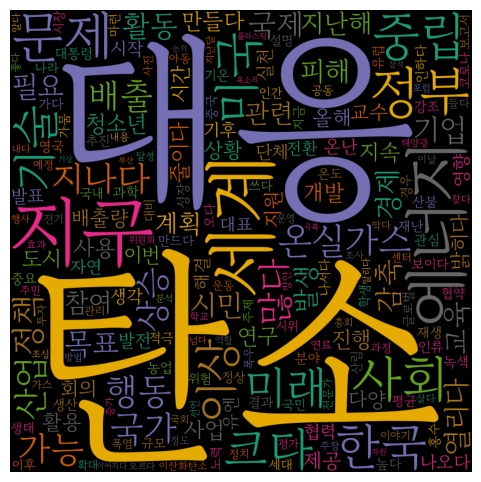

In [75]:
# 워드 클라우드를 시각화
plt.figure(figsize = (6, 6), dpi = 100)
wcgf = wc.generate_from_frequencies(frequencies = freq)
plt.imshow(X = wcgf)
plt.axis('off')
plt.savefig('media2_워드클라우드.png')
plt.show()

## 연관 단어 시각화

In [17]:
# 단어 간 상관계수 행렬 생성
# [참고] 열(차원) 개수가 많을수록 오래 걸림
corMat = dtm.corr().round(4)

In [18]:
# corMat의 일부 확인
corMat.iloc[0:10, 0:10]

,가격,가능,가다,가디언,가뭄,가속,가스,가운데,가입,가정
가격,1.0000,-0.0647,-0.0253,-0.0331,-0.0053,0.0295,0.0341,0.0138,-0.0189,0.0833
가능,-0.0647,1.0000,0.1228,-0.0091,0.0048,0.1729,0.0630,0.0396,-0.0161,0.0744
가다,-0.0253,0.1228,1.0000,-0.0081,-0.0349,0.0591,0.2757,0.1038,0.0248,0.0205
가디언,-0.0331,-0.0091,-0.0081,1.0000,0.1463,-0.0248,-0.0036,-0.0017,0.0109,-0.0069
가뭄,-0.0053,0.0048,-0.0349,0.1463,1.0000,-0.0345,0.0568,-0.0085,-0.0602,0.0203
가속,0.0295,0.1729,0.0591,-0.0248,-0.0345,1.0000,-0.0044,0.0171,0.0752,-0.0011
가스,0.0341,0.0630,0.2757,-0.0036,0.0568,-0.0044,1.0000,-0.0090,0.0094,-0.0202
가운데,0.0138,0.0396,0.1038,-0.0017,-0.0085,0.0171,-0.0090,1.0000,0.0613,-0.0088
가입,-0.0189,-0.0161,0.0248,0.0109,-0.0602,0.0752,0.0094,0.0613,1.0000,-0.0024
가정,0.0833,0.0744,0.0205,-0.0069,0.0203,-0.0011,-0.0202,-0.0088,-0.0024,1.0000


In [19]:
# 키워드 연관 단어로 막대 그래프를 그리는 함수 생성
def plot_assocs(keyword, n = 10, pal = 'Greys_r'):
    assocs = corMat[keyword].sort_values(ascending = False).head(n = n+1).iloc[1:]
    sns.barplot(x = assocs.index, y = assocs.values, hue = assocs.index, palette = pal)
    plt.title(label = '연관 단어 목록')
    plt.xlabel(xlabel = '고빈도 단어')
    plt.ylim(0, 1.0)
    for i, v in enumerate(assocs):
        plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom')

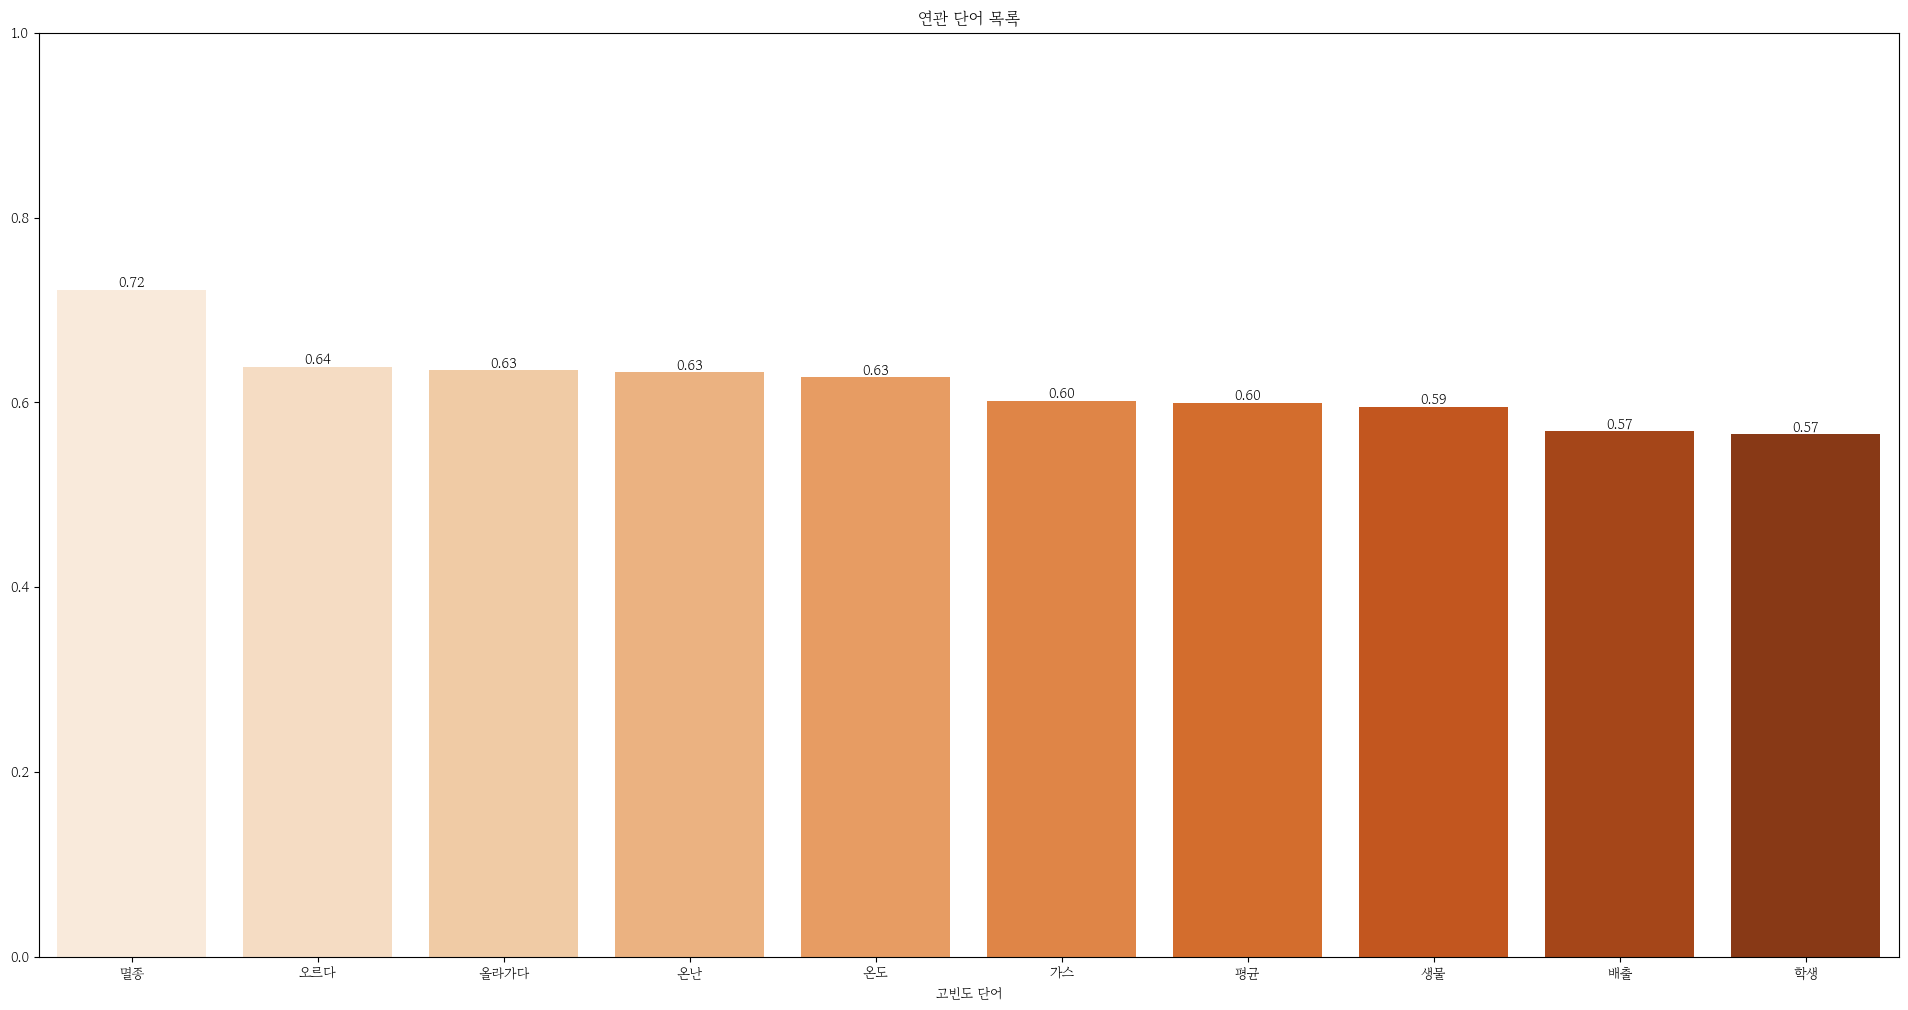

In [36]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '지구', pal = 'Oranges')
plt.savefig('media2_연관단어_지구.png')
plt.show()